In [296]:
# Carlos Eduardo Fuentes Romero
# Tarea 1 Análisis de datos con Python

In [297]:
import pandas as pd 

In [298]:
# Leer archivo csv
data=pd.read_csv("DataSet/aug_train.csv",sep=",")

In [299]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [256]:
data.shape

(19158, 14)

In [257]:
# Limpieza y transformación de los datos

# 1. Verificar los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [258]:
# 2. Revisar si hay valores faltantes
missing_values = data.isnull().sum()

In [259]:
# 3. Revisar valores únicos para identificar posibles errores en las variables categóricas
unique_values = {col: data[col].unique() for col in data.select_dtypes(include='object').columns}

In [260]:
missing_values, unique_values

(enrollee_id                  0
 city                         0
 city_development_index       0
 gender                    4508
 relevent_experience          0
 enrolled_university        386
 education_level            460
 major_discipline          2813
 experience                  65
 company_size              5938
 company_type              6140
 last_new_job               423
 training_hours               0
 target                       0
 dtype: int64,
 {'city': array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
         'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
         'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
         'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
         'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
         'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
         'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
         'city_50', 'c

In [261]:
# Análisis exploratorio de datos (EDA)

# Resumen estadístico de las variables numéricas
numerical_summary = data.describe()


In [262]:
# Distribución de las variables categóricas
categorical_summary = data.select_dtypes(include='object').describe()

# Análisis de la distribución de la variable objetivo 'y' (resultado de la campaña)
target_distribution = data['target'].value_counts(normalize=True)

# Análisis por tipo de género
gender_distribution = data['gender'].value_counts(normalize=True)

In [263]:
numerical_summary, categorical_summary, target_distribution, gender_distribution

(        enrollee_id  city_development_index  training_hours        target
 count  19158.000000            19158.000000    19158.000000  19158.000000
 mean   16875.358179                0.828848       65.366896      0.249348
 std     9616.292592                0.123362       60.058462      0.432647
 min        1.000000                0.448000        1.000000      0.000000
 25%     8554.250000                0.740000       23.000000      0.000000
 50%    16982.500000                0.903000       47.000000      0.000000
 75%    25169.750000                0.920000       88.000000      0.000000
 max    33380.000000                0.949000      336.000000      1.000000,
             city gender      relevent_experience enrolled_university  \
 count      19158  14650                    19158               18772   
 unique       123      3                        2                   3   
 top     city_103   Male  Has relevent experience       no_enrollment   
 freq        4355  13221        

In [264]:
# Conteo por tipo de empresa
data["company_type"].value_counts()

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

In [265]:
import boto3 # pip install boto3
import pandas as pd # pip install pandas
from io import StringIO 
from ydata_profiling import ProfileReport # pip install ydata-profiling

In [266]:
# Generar el informe de perfil
profile = ProfileReport(data)

# Mostrar el informe
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el estilo de las gráficas
sns.set(style="whitegrid")

C:\Users\inspi\AppData\Local\Temp\ipykernel_51652\3918696012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='target', palette='Set2')


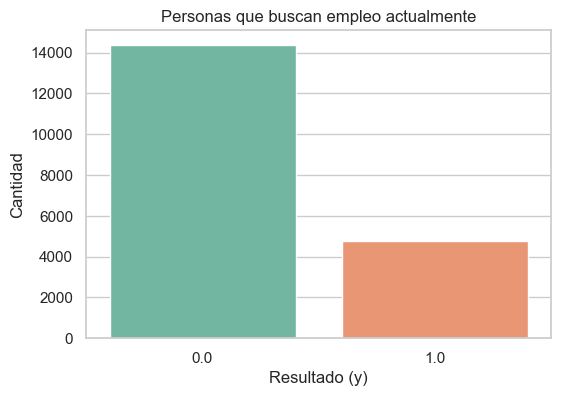

In [268]:
# 1. Distribución de la variable objetivo (target)
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='target', palette='Set2')
plt.title('Personas que buscan empleo actualmente')
plt.xlabel('Resultado (y)')
plt.ylabel('Cantidad')
plt.show()


C:\Users\inspi\AppData\Local\Temp\ipykernel_51652\3515569896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gender', palette='Set2')


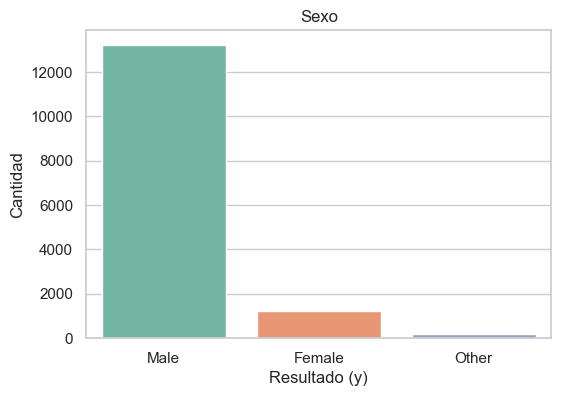

In [269]:
# 1. Distribución de la variable gender
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='gender', palette='Set2')
plt.title('Sexo')
plt.xlabel('Resultado (y)')
plt.ylabel('Cantidad')
plt.show()


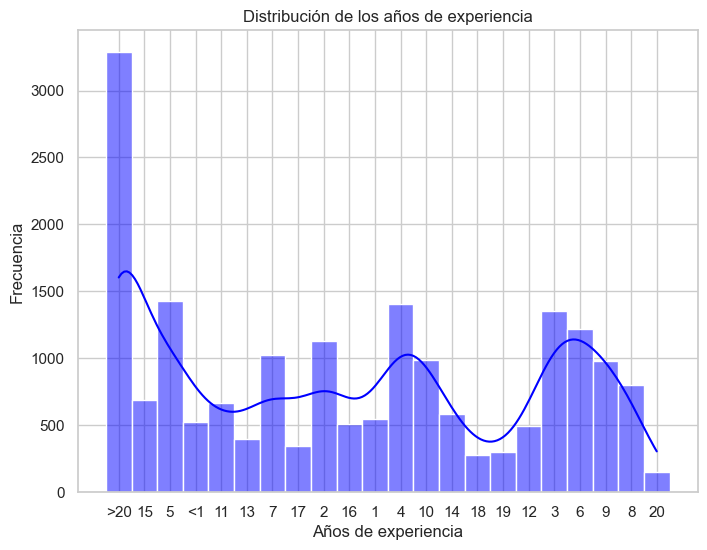

In [270]:
# 2. Histograma de la variable "experience"
plt.figure(figsize=(8,6))
sns.histplot(data['experience'], bins=30, kde=True, color='blue')
plt.title('Distribución de los años de experiencia')
plt.xlabel('Años de experiencia')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\inspi\AppData\Local\Temp\ipykernel_51652\2153084683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='company_size', order=data['company_size'].value_counts().index, palette='viridis')


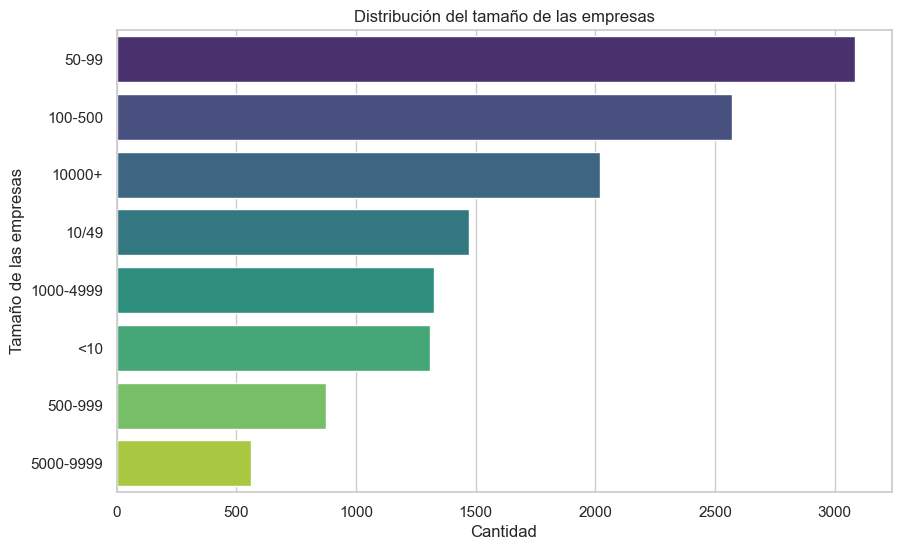

In [271]:
# 3. Gráfico de barras según el tamaño de las empresas
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='company_size', order=data['company_size'].value_counts().index, palette='viridis')
plt.title('Distribución del tamaño de las empresas')
plt.xlabel('Cantidad')
plt.ylabel('Tamaño de las empresas')
plt.show()

C:\Users\inspi\AppData\Local\Temp\ipykernel_51652\1294714542.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='education_level', order=data['education_level'].value_counts().index, palette='viridis')


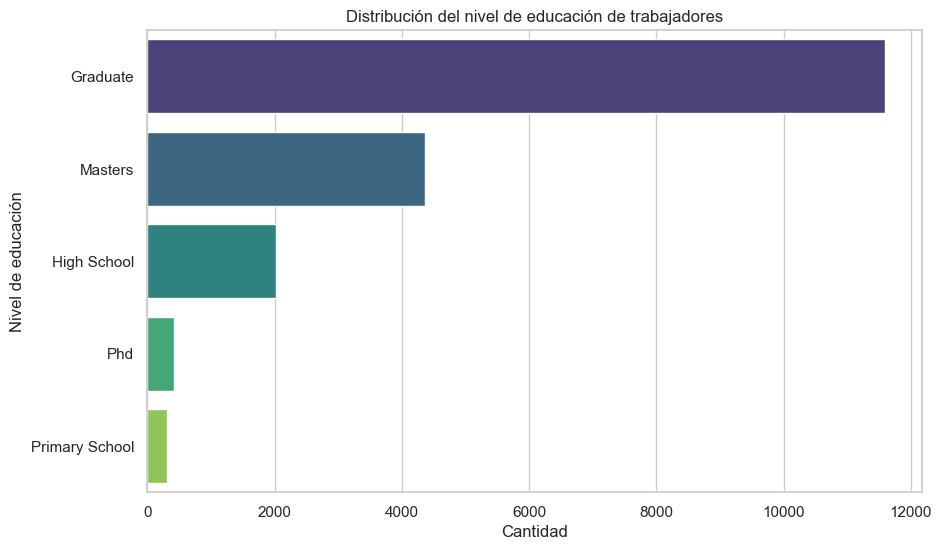

In [272]:
# 3. Gráfico de barras del nivel de educación
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='education_level', order=data['education_level'].value_counts().index, palette='viridis')
plt.title('Distribución del nivel de educación de trabajadores')
plt.xlabel('Cantidad')
plt.ylabel('Nivel de educación')
plt.show()

<Axes: >

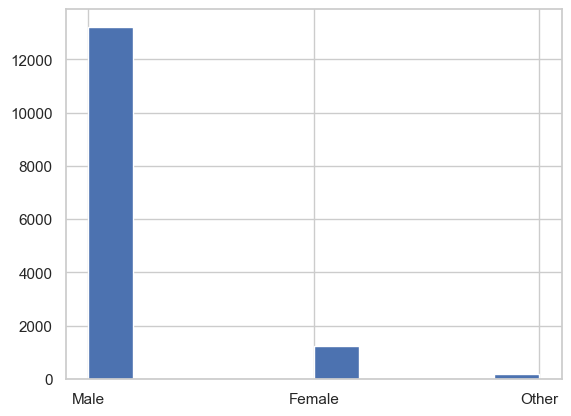

In [273]:
# histograma según el campo gender
data["gender"].hist()

<Axes: >

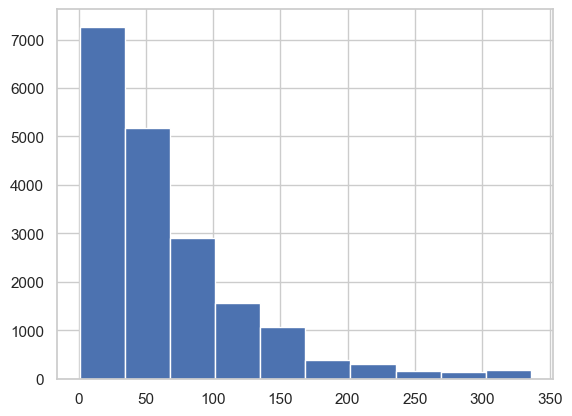

In [274]:
# histograma según las horas de entrenamiento
data["training_hours"].hist()

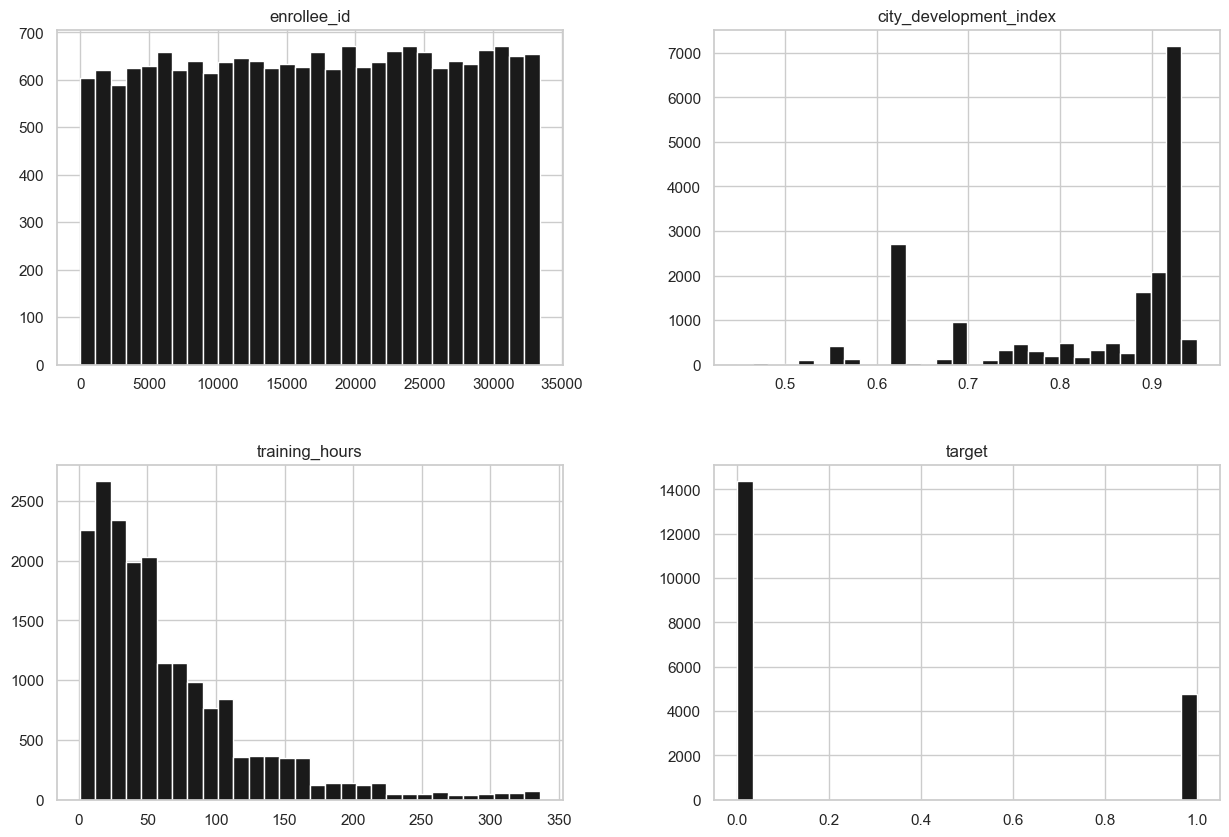

In [275]:
data.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

In [276]:
# Realizar ordenamiento según la expriencia, por orden descendente
data.sort_values(by = "experience", ascending = False).head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
3866,30318,city_114,0.926,Male,Has relevent experience,Part time course,Masters,STEM,>20,50-99,Pvt Ltd,4,102,1.0
14064,1253,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,10000+,Pvt Ltd,>4,42,0.0
3876,6219,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,88,1.0
9735,29674,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,Arts,>20,NaN,NaN,>4,27,0.0
14061,11170,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4,54,0.0
17158,10976,city_104,0.924,NaN,No relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,12,1.0
9743,23323,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,37,0.0
3864,30032,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,NaN,1,25,0.0
17155,2507,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,500-999,Pvt Ltd,>4,12,0.0


In [277]:
# filtrar la experiencia mayor a 20 años y realizar análisis de campos tipo objeto
datos_filtrados_experiencia=data[data['experience']=='>20'].select_dtypes(include='object').describe()
datos_filtrados_experiencia

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,3286,2799,3286,3255,3230,3095,3286,2369,2366,3253
unique,100,3,2,3,5,6,1,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,>4
freq,1179,2611,2883,3092,1879,2681,3286,483,1853,1489


In [278]:
# filtrar por campo target, o sea, las personas que se encuentran buscando trabajo activamente y realizar análisis
data[data["target"] == 1.0].select_dtypes(include='object').describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,4777,3388,4777,4654,4673,4228,4754,2367,2393,4623
unique,115,3,2,3,5,6,22,8,6,6
top,city_21,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,1597,3012,2961,2921,3245,3791,503,545,1775,2125


In [279]:
# agrupar por tipo de tamaño de empresa
data_company_size=data.groupby("company_size")

In [280]:
data_company_size.size().sort_values(ascending=False)

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
dtype: int64

In [281]:
data_company_size.size().index[:10]

Index(['10/49', '100-500', '1000-4999', '10000+', '50-99', '500-999',
       '5000-9999', '<10'],
      dtype='object', name='company_size')

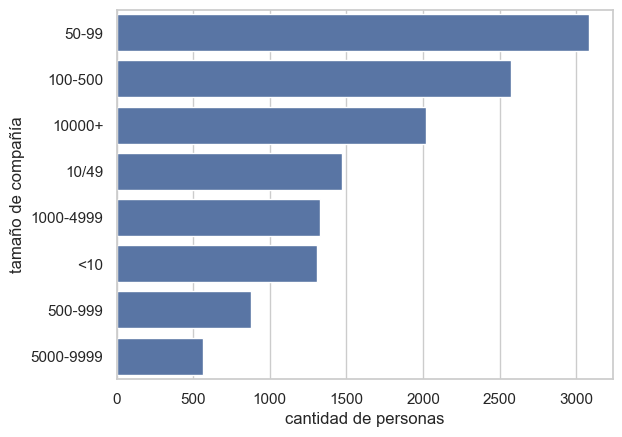

In [282]:
# Geenerar gráfica por tipo de compañía y sus cantidades respectivas
sns.barplot(x = data_company_size.size().sort_values(ascending=False), y = data_company_size.size().sort_values(ascending=False).index[:10])
plt.ylabel('tamaño de compañía')
plt.xlabel('cantidad de personas')
plt.show()

In [283]:
# obtener el porcentaje por tamaño de compañía
company_size_distribution = data['company_size'].value_counts(normalize=True)
company_size_distribution

company_size
50-99        0.233207
100-500      0.194478
10000+       0.152723
10/49        0.111271
1000-4999    0.100454
<10          0.098941
500-999      0.066339
5000-9999    0.042587
Name: proportion, dtype: float64

In [286]:
# Nivel de educación, por personas que se encuentran buscando trabajo y las que no
data.groupby(
    "target"
).education_level.value_counts(
    normalize=True)

target  education_level
0.0     Graduate           0.595579
        Masters            0.244278
        High School        0.115722
        Phd                0.025383
        Primary School     0.019037
1.0     Graduate           0.694415
        Masters            0.200086
        High School        0.084314
        Phd                0.012412
        Primary School     0.008774
Name: proportion, dtype: float64

In [291]:
# Porcentaje de personas que se encuentran buscando trabajo de acuerdo a su nivel educativo
data_activo_nivel_educativo=data[data["target"] == 1.0].education_level.value_counts(normalize=True)
data_activo_nivel_educativo

education_level
Graduate          0.694415
Masters           0.200086
High School       0.084314
Phd               0.012412
Primary School    0.008774
Name: proportion, dtype: float64

C:\Users\inspi\AppData\Local\Temp\ipykernel_51652\2880524512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data["target"] == 1.0], x='education_level', palette='Set2')


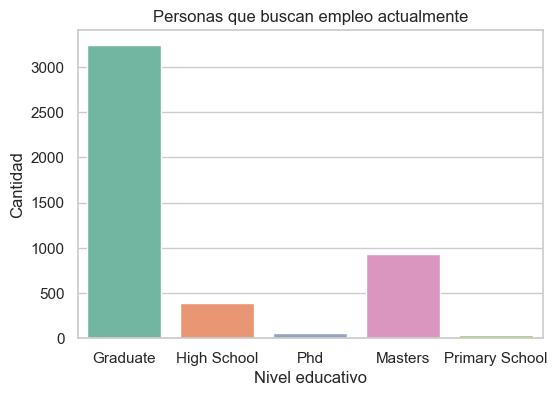

In [295]:
# Nivel educativo de personas que se encuentran buscando trabajo
plt.figure(figsize=(6,4))
sns.countplot(data=data[data["target"] == 1.0], x='education_level', palette='Set2')
plt.title('Personas que buscan empleo actualmente')
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad')
plt.show()